<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/CNN_with_Mnist_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CNN/CovNet**

#**The Fashion-MNIST Data Set**
The *Fashion-MNIST dataset* is a dataset of Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images. You can double check this later when you have loaded in your data! ;)

Fashion-MNIST is similar to the MNIST dataset that you might already know, which you use to classify handwritten digits. That means that the image dimensions, training and test splits are similar to the MNIST dataset.

In [18]:
# Initialize the random number generator

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
# from keras.models import Sequential
from keras.layers import Activation, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU

import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [19]:
from keras.datasets import fashion_mnist
import warnings
warnings.filterwarnings('ignore')
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

# Analyze the Data

In [20]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [21]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

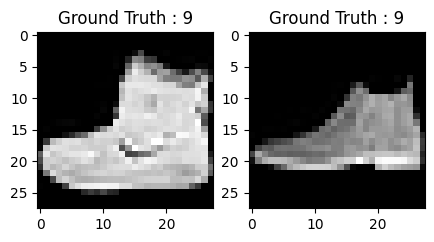

In [22]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

The output of above two plots looks like an ankle boot, and this class is assigned a class label of 9. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 ankle boot images will have a class label of 9.

# Data Preprocessing

In [23]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
#normalize
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [25]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [26]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

You'll use three convolutional layers:

1. The first layer will have 32-3 x 3 filters,
2. The second layer will have 64-3 x 3 filters and
3. The third layer will have 128-3 x 3 filters.

In addition, there are three max-pooling layers each of size 2 x 2.

Model Architecture:

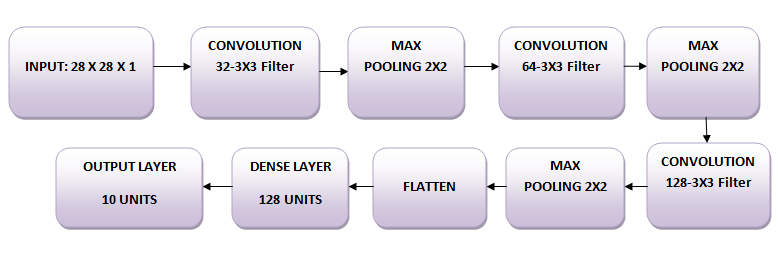

In [27]:
#Define Input Parameters

batch_size = 64
epochs = 20
num_classes = 10

In [28]:
#Convolution layer

fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Flatten())


#Fully connected Layer

fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [29]:
#Compile the model

fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [30]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

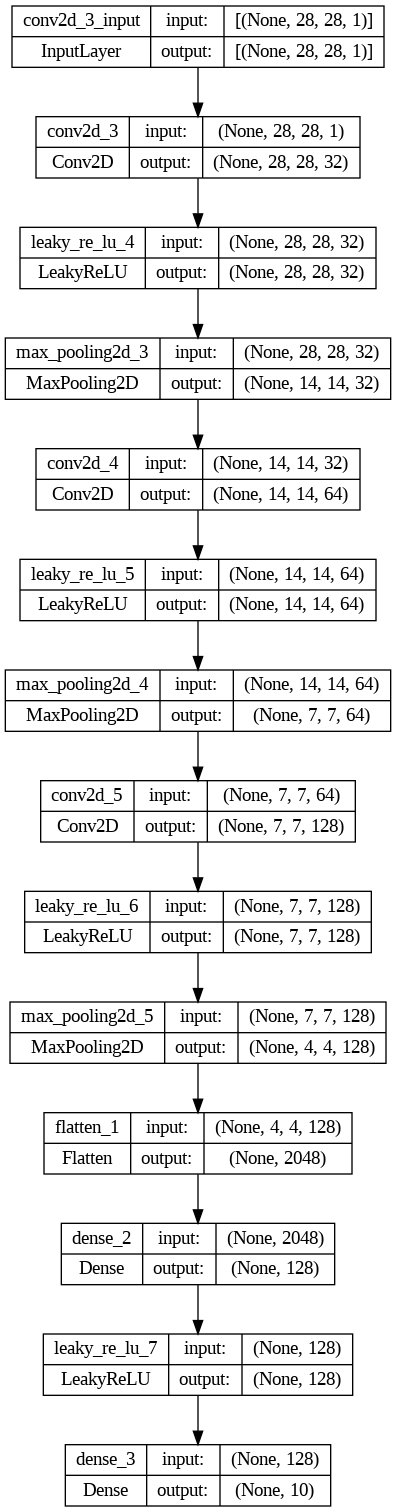

In [31]:
plot_model(fashion_model, to_file='mlp-mnist.png', show_shapes=True)

## Train the Model

In [32]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 96s 125ms/step - loss: 0.4640 - accuracy: 0.8311 - val_loss: 0.3556 - val_accuracy: 0.8689
Epoch 2/20
750/750 [==============================] - 98s 131ms/step - loss: 0.2848 - accuracy: 0.8964 - val_loss: 0.2916 - val_accuracy: 0.8911
Epoch 3/20
750/750 [==============================] - 96s 128ms/step - loss: 0.2373 - accuracy: 0.9125 - val_loss: 0.2547 - val_accuracy: 0.9077
Epoch 4/20
750/750 [==============================] - 92s 122ms/step - loss: 0.2070 - accuracy: 0.9230 - val_loss: 0.2384 - val_accuracy: 0.9157
Epoch 5/20
750/750 [==============================] - 95s 127ms/step - loss: 0.1802 - accuracy: 0.9329 - val_loss: 0.2438 - val_accuracy: 0.9107
Epoch 6/20
750/750 [==============================] - 113s 151ms/step - loss: 0.1573 - accuracy: 0.9406 - val_loss: 0.2316 - val_accuracy: 0.9170
Epoch 7/20
750/750 [==============================] - 97s 129ms/step - loss: 0.1344 - accuracy: 0.9511 - val_loss: 0.2389 - val_a

##Model Evaluation on the Test Set

In [33]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [34]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5228385329246521
Test accuracy: 0.9110000133514404


In [35]:
fashion_train.history

{'loss': [0.4639665186405182,
  0.28477218747138977,
  0.2373284250497818,
  0.20700520277023315,
  0.18018825352191925,
  0.1572791486978531,
  0.1343575268983841,
  0.11708424240350723,
  0.09998989850282669,
  0.08516239374876022,
  0.07569493353366852,
  0.06534476578235626,
  0.053707387298345566,
  0.051297880709171295,
  0.04210704192519188,
  0.04069565236568451,
  0.03713056817650795,
  0.031421516090631485,
  0.031441204249858856,
  0.0257736723870039],
 'accuracy': [0.8311041593551636,
  0.8963541388511658,
  0.9125208258628845,
  0.9230416417121887,
  0.932895839214325,
  0.940625011920929,
  0.9511041641235352,
  0.9574791789054871,
  0.9622916579246521,
  0.9680208563804626,
  0.9717708230018616,
  0.9757083058357239,
  0.979479193687439,
  0.9810208082199097,
  0.9841874837875366,
  0.9847708344459534,
  0.9865000247955322,
  0.9886041879653931,
  0.9884999990463257,
  0.9906041622161865],
 'val_loss': [0.35559892654418945,
  0.2915596663951874,
  0.2546570897102356,
  0

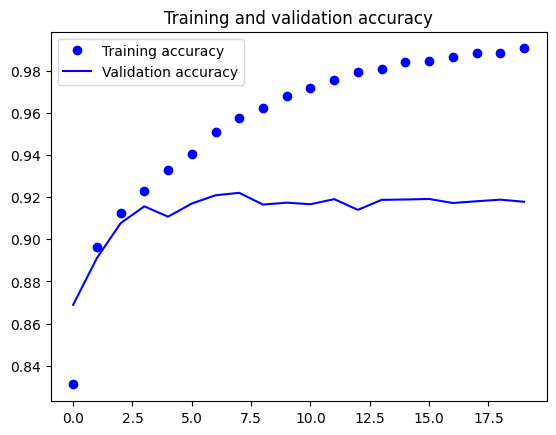

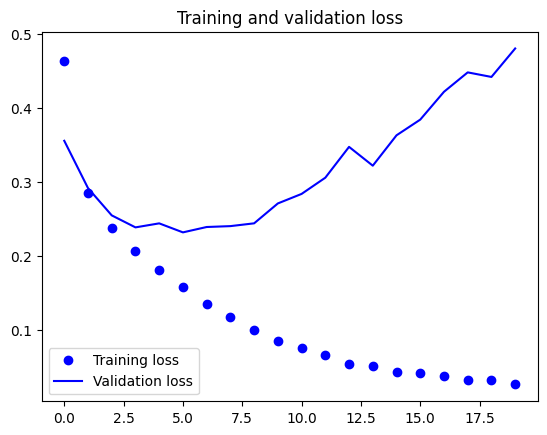

In [36]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Adding Dropout into the Network

In [37]:
batch_size = 64
epochs = 20
num_classes = 10

In [38]:
#Convolution Layer

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())

#Fully Connected Layer

fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [39]:
#Compile the model

fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])



fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 104s 137ms/step - loss: 0.5975 - accuracy: 0.7807 - val_loss: 0.3702 - val_accuracy: 0.8654
Epoch 2/20
750/750 [==============================] - 100s 133ms/step - loss: 0.3804 - accuracy: 0.8586 - val_loss: 0.3133 - val_accuracy: 0.8847
Epoch 3/20
750/750 [==============================] - 106s 142ms/step - loss: 0.3360 - accuracy: 0.8761 - val_loss: 0.2851 - val_accuracy: 0.8923
Epoch 4/20
750/750 [==============================] - 102s 136ms/step - loss: 0.3067 - accuracy: 0.8872 - val_loss: 0.2599 - val_accuracy: 0.9032
Epoch 5/20
750/750 [==============================] - 99s 132ms/step - loss: 0.2843 - accuracy: 0.8938 - val_loss: 0.2503 - val_accuracy: 0.9082
Epoch 6/20
750/750 [==============================] - 101s 135ms/step - loss: 0.2708 - accuracy: 0.8989 - val_loss: 0.2440 - val_accuracy: 0.9099
Epoch 7/20
750/750 [==============================] - 107s 142ms/step - loss: 0.2608 - accuracy: 0.9033 - val_loss: 0.2395 - 

In [40]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [41]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.23013649880886078
Test accuracy: 0.9161999821662903


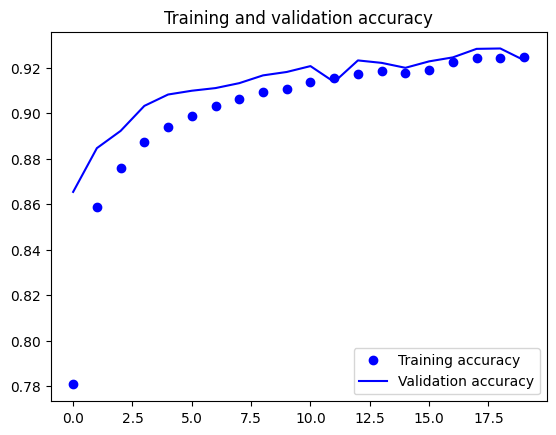

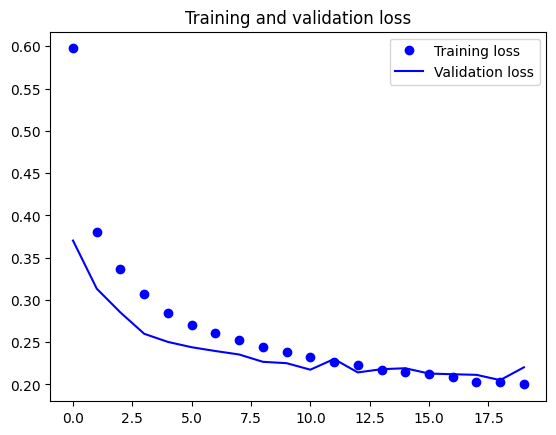

In [42]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()